In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lib import costFunction, gradientDescent, featureNormalize, plotCostSurface

# Load data

In [2]:
data = pd.read_csv('housing.data', delim_whitespace=True, header=None)
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data.columns = columns

X = data[['RM']].values
y = data['MEDV'].values

# Single variable

## Plot

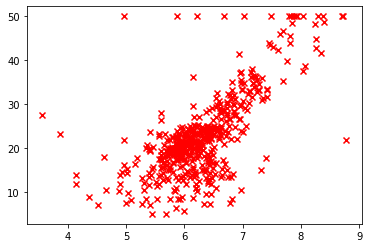

In [3]:
ax = plt.subplot()
ax.scatter(X, y, marker='x', color='red')
plt.show()

## Compute cost function

### ※YOUR CODE IS HERE

In [4]:
m, n = X.shape

X_ = np.c_[np.ones(m), X]
print(X_.shape)
y_ = y.reshape(len(X), 1)

J = costFunction(X_, y_, np.zeros((2, 1)))
print('Testing cost function: %.2f' % J)

J = costFunction(X_, y_, np.array([[-1], [1]]))
print('Testing cost function: %.2f' % J)

(506, 2)
Testing cost function: 296.07
Testing cost function: 186.72


Your cost function will be below.

```
Testing cost function: 296.07
Testing cost function: 186.72
```

### ※END

## Gradient descent

### ※YOUR CODE IS HERE

In [5]:
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01
theta_min, j_hist = gradientDescent(X_, y_, theta, alpha, iterations)
print('Theta min: \n', theta_min)
print('Cost min: %.3f' % j_hist[-1])

Theta min: 
 [[-5.25408702]
 [ 4.47768074]]
Cost min: 27.131


**Your theta min and cost function will be**

```
Theta min: 
 [[-5.25408702]
 [ 4.47768074]]
Cost min: 27.131
```

### ** END **

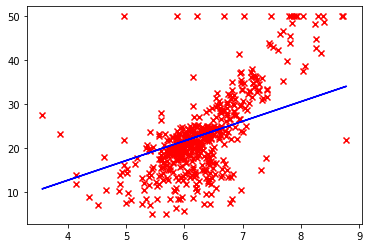

In [6]:
ax = plt.subplot()
ax.scatter(X, y, marker='x', color='red')
ax.plot(X, np.dot(X_, theta_min).reshape(-1), color='blue')
plt.show()

# Multi variables

In [7]:
X = data[['RM', 'CRIM']].values
y = data['MEDV'].values

## Gradient Descent

### ** YOUR CODE IS HERE **

In [8]:
%%time
X_ = np.c_[np.ones(m), X]
m, n = X_.shape
y_ = y.reshape(m, 1)

theta = np.zeros((n, 1))
iterations = 1500
alpha = 0.01
theta_min, j_hist = gradientDescent(X_, y_, theta, alpha, iterations)
print('Theta min: \n', theta_min)
print('Cost min: %.3f' % j_hist[-1])

Theta min: 
 [[-4.03274005]
 [ 4.47264387]
 [-0.34892771]]
Cost min: 22.981
CPU times: user 13.2 ms, sys: 706 µs, total: 13.9 ms
Wall time: 13.4 ms


**Your theta min and cost function will be**

```
Theta min: 
 [[-4.03274005]
 [ 4.47264387]
 [-0.34892771]]
Cost min: 22.981
```

Try feature normalization and confirm how it works well. If your result is unexpected, what is the cause?

In [9]:
%%time
X = featureNormalize(X)
X_ = np.c_[np.ones(m), X]
y_ = y.reshape(m, 1)
theta = np.zeros((n, 1))
iterations = 1500
alpha = 0.01
theta_min, j_hist = gradientDescent(X_, y_, theta, alpha, iterations)
print('Theta min: \n', theta_min)
print('Cost min: %.3f' % j_hist[-1])

Theta min: 
 [[19.53058501]
 [12.12832145]
 [-2.36849756]]
Cost min: 29.091
CPU times: user 13.4 ms, sys: 1.34 ms, total: 14.8 ms
Wall time: 14.1 ms


### ** END **